### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### View descriptive stats

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

### Check for imbalanced data

<Axes: xlabel='count', ylabel='sentiment'>

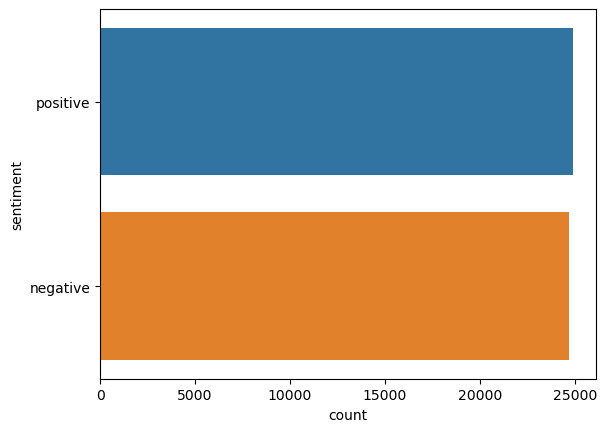

In [10]:
sns.countplot(data=df,y='sentiment')

In [11]:
(df['sentiment']=='positive').sum()

24884

In [12]:
(df['sentiment']=='negative').sum()

24698

Text(0.5, 1.0, 'Pie chart')

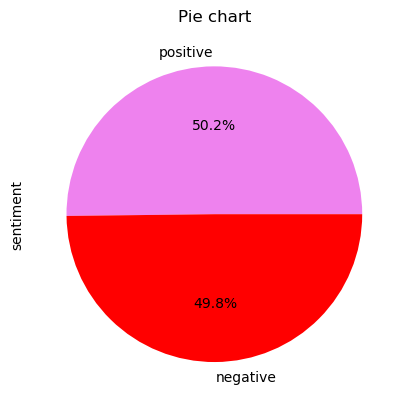

In [13]:
sentiment_counts=df['sentiment'].value_counts()
plt.pie(sentiment_counts,colors=['violet','red'], labels=sentiment_counts.index,autopct='%1.1f%%')
plt.ylabel('sentiment')
plt.title('Pie chart')

### Create a function to Preprocess the review column

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
def preprocess(sentence):
    
    text=re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    text=[i.lower() for i in text]
    
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(word,'v') for word in text ]
    
    return ' '.join(text)

In [16]:
#apply function in review column
df['review']=df['review'].apply(preprocess)

### Print some text after applying the function

In [17]:
for i in range(15):
    print(df['review'][i])
    print()

one of the other reviewers have mention that after watch just 1 oz episode you ll be hook they be right as this be exactly what happen with me br br the first thing that strike me about oz be its brutality and unflinching scenes of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence its be hardcore in the classic use of the word br br it be call oz as that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cells have glass front and face inwards so privacy be not high on the agenda em city be home to many aryans muslims gangstas latinos christians italians irish and more so scuffle death star dodgy deal and shady agreements be never far away br br i would say the main appeal of the show be due to the fact that it go where other show wouldn t dare forget pretty picture paint 

### Split the dataset into Input (X) & Target (y) variable

In [18]:
X=df['review']
y=df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [19]:
def zero_one(sentiment):
    if sentiment == 'negative':
        return 1
    elif sentiment == 'positive':
        return 0
    else:
        return None 

In [20]:
y=y.apply(zero_one)


In [21]:
y

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 49582, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [23]:
tokenizer=Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5)

In [25]:
#"fit_on_texts" - This method creates the vocabulary index based on word frequency. Each word gets a unique id
tokenizer.fit_on_texts(X_train)

In [26]:
vocab_size=len(tokenizer.word_index)+1

In [27]:
len(tokenizer.word_index)

65047

In [28]:
tokenizer

In [29]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=2000)    
       
    return padded_sequence

In [30]:
max_length = df['review'].apply(lambda x: len(x.split())).max()
max_length

2525

In [31]:
#Apply the function on both Training and Testing set
X_train=text_encoding(X_train)
X_test=text_encoding(X_test)

### Create keras Sequential Model with LSTM Layers

In [32]:
vocab_size

65048

In [33]:
from keras import Sequential
from keras import layers

In [34]:
model=Sequential()
#embedding layer
model.add(layers.Embedding(vocab_size,128))
#lstm layer
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1,activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         8326144   
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

### Compile the model

In [36]:
y_train

15438    1
29402    1
3752     1
7155     1
25836    1
        ..
48769    0
38858    0
6100     0
37867    0
19646    0
Name: sentiment, Length: 24791, dtype: int64

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Train the model with our training set

In [38]:
set(y_train)

{0, 1}

In [39]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
620/620 [==============================] - 1886s 3s/step - loss: 0.4805 - accuracy: 0.4991 - val_loss: 0.3573 - val_accuracy: 0.5037
Epoch 2/5
620/620 [==============================] - 2749s 4s/step - loss: 0.3098 - accuracy: 0.4991 - val_loss: 0.3843 - val_accuracy: 0.5037
Epoch 3/5
620/620 [==============================] - 27206s 44s/step - loss: 0.2581 - accuracy: 0.4991 - val_loss: 0.3412 - val_accuracy: 0.5037
Epoch 4/5
620/620 [==============================] - 1975s 3s/step - loss: 0.2233 - accuracy: 0.4991 - val_loss: 0.4008 - val_accuracy: 0.5037
Epoch 5/5
620/620 [==============================] - 4729s 8s/step - loss: 0.1968 - accuracy: 0.4991 - val_loss: 0.3364 - val_accuracy: 0.5037


### Make prediction with X_test

In [42]:
y_pred=model.predict(X_test)

775/775 [==============================] - 649s 837ms/step


### Convert to 0 and 1 with higher probability towards 1

In [45]:
y_pred=[np.argmax(i) for i in y_pred]

In [46]:
len(y_pred)

24791

In [47]:
len(y_test)

24791

In [48]:
y_test=[np.argmax(i) for i in y_test]

### Evaluate the model

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Check accuracy score

In [51]:
accuracy_score(y_test,y_pred)

1.0

### Check confusion matrix

<Axes: >

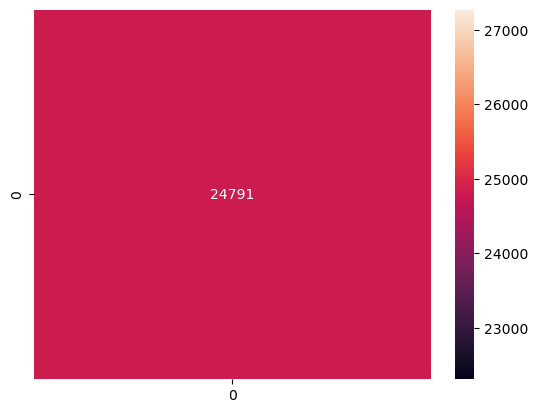

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print Classification report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24791

    accuracy                           1.00     24791
   macro avg       1.00      1.00      1.00     24791
weighted avg       1.00      1.00      1.00     24791



***